In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [35]:
df= pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [44]:
x= df.iloc[:,1:4]
y = df.iloc[:, 4]

In [45]:
print(x.columns)



Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')


In [46]:

le_gender= LabelEncoder()
x['Gender']= le_gender.fit_transform(x['Gender'])
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [47]:
df['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


In [48]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [49]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=0)

In [50]:
clf = XGB()
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
from sklearn.metrics import confusion_matrix
y_pred= clf.predict(x_test)
print(confusion_matrix(y_test, y_pred))


[[54  4]
 [ 2 20]]


In [53]:
acc= accuracy_score(y_test, y_pred)
print(acc)


0.925


In [57]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)


[Text(0.45426829268292684, 0.9615384615384616, 'x[1] <= 44.5\nentropy = 0.957\nsamples = 320\nvalue = [199, 121]'),
 Text(0.2682926829268293, 0.8846153846153846, 'x[2] <= 90500.0\nentropy = 0.708\nsamples = 228\nvalue = [184, 44]'),
 Text(0.3612804878048781, 0.9230769230769231, 'True  '),
 Text(0.17073170731707318, 0.8076923076923077, 'x[1] <= 36.5\nentropy = 0.256\nsamples = 186\nvalue = [178, 8]'),
 Text(0.14634146341463414, 0.7307692307692307, 'entropy = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.1951219512195122, 0.7307692307692307, 'x[2] <= 67500.0\nentropy = 0.533\nsamples = 66\nvalue = [58, 8]'),
 Text(0.17073170731707318, 0.6538461538461539, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.21951219512195122, 0.6538461538461539, 'x[2] <= 83500.0\nentropy = 0.799\nsamples = 33\nvalue = [25, 8]'),
 Text(0.1951219512195122, 0.5769230769230769, 'x[2] <= 70500.0\nentropy = 0.709\nsamples = 31\nvalue = [25, 6]'),
 Text(0.17073170731707318, 0.5, 'entropy = 0.0\nsamples = 1

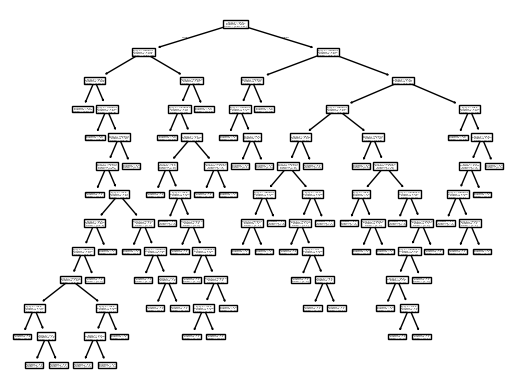

In [58]:
tree.plot_tree(clf)


In [59]:
y_pred = clf.predict(x_test)


In [64]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(format(accuracy * 100))


88.75


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [68]:
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
y_pred = clf.predict(x_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(format(accuracy * 100))

91.25


In [71]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)

In [72]:
clf.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [73]:
y_pred = clf.predict(x_test)

# حساب دقة النموذج
accuracy = accuracy_score(y_test, y_pred)


In [74]:
print(format(accuracy * 100))



92.5
